In [ ]:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from scipy.stats import gaussian_kde, skew
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# convert to dataframe
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# shape of the initial dataframe
df.shape

(7043, 21)

In [ ]:
# to avoid truncated
pd.set_option('display.max_columns', None)

In [ ]:
# view first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# The customerID column is not required for the modelling, so it is dropped
df = df.drop(columns = ['customerID'])

In [ ]:
# basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The SeniorCitizen is categorical but showing as int64 and the TotalCharges should be numerical type but here given as object type (need to convert it to numeric type)



numeric types so far = ['MonthlyCharges', 'tenure', 'SeniorCitizen']



object types so far = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'TechSupport' , 'StreamingTV' , 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
# check for the null values in the features
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


So, no null values, but be cautious it can be as space or any symbols(?)

In [ ]:
# convert the TotalCharges to numeric
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

could not convert string to float: ' ' - so empty space present instaed of null values

In [ ]:
# find the rows with empty spaces for the TotalCharges
df[df['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Blank spaces
df['TotalCharges'].eq(" ").sum()

np.int64(11)

In [ ]:
# replace zero for empty TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0.0")

In [ ]:
# now convert the 'TotalCharges' as numeric
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


find the duplicates

In [ ]:
df.duplicated().sum()

np.int64(22)

In [ ]:
# remove the duplicates
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Distribution of target columns
df['Churn'].value_counts()

,count
Churn,
No,5164
Yes,1857


imbalance present in the target, need to do unsampling or downsampling

In [ ]:
# statistical information of features (numeric)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


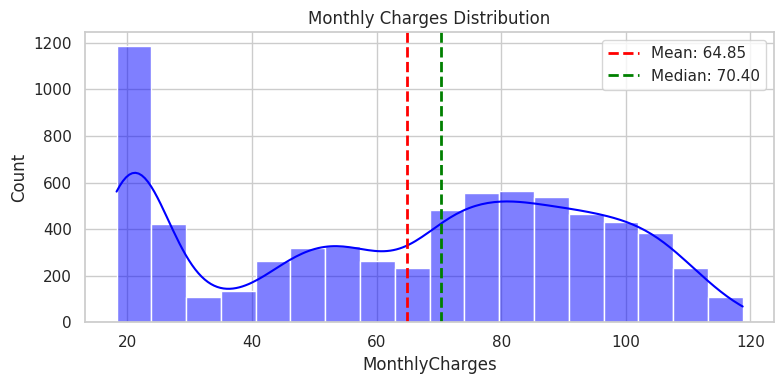

Monthly Charges Distribution
Mean: 64.85
Median: 70.40


In [ ]:
# histogram for numerical variables
plt.figure(figsize=(8, 4))

# Set plot style
sns.set(style="whitegrid")

# MonthlyCharges Distribution
sns.histplot(df['MonthlyCharges'], kde=True, color="blue")
plt.title('Monthly Charges Distribution')

# mean median
col_mean = df['MonthlyCharges'].mean()
col_median = df['MonthlyCharges'].median()

# vertical lines of mean and median
plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {col_mean:.2f}')
plt.axvline(col_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {col_median:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print("Monthly Charges Distribution")
print(f"Mean: {col_mean:.2f}")
print(f"Median: {col_median:.2f}")

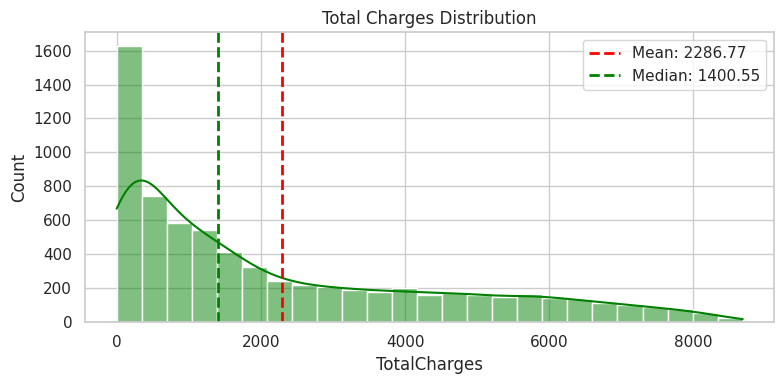

Total Charges Distribution
Mean: 2286.77
Median: 1400.55


In [ ]:
# histogram for numerical variables
plt.figure(figsize=(8, 4))

# plot style
sns.set(style="whitegrid")

# TotalCharges Distribution
sns.histplot(df['TotalCharges'], kde=True, color="green")
plt.title('Total Charges Distribution')

# mean median
col_mean = df['TotalCharges'].mean()
col_median = df['TotalCharges'].median()

# vertical lines of mean and median
plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {col_mean:.2f}')
plt.axvline(col_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {col_median:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print("Total Charges Distribution")
print(f"Mean: {col_mean:.2f}")
print(f"Median: {col_median:.2f}")

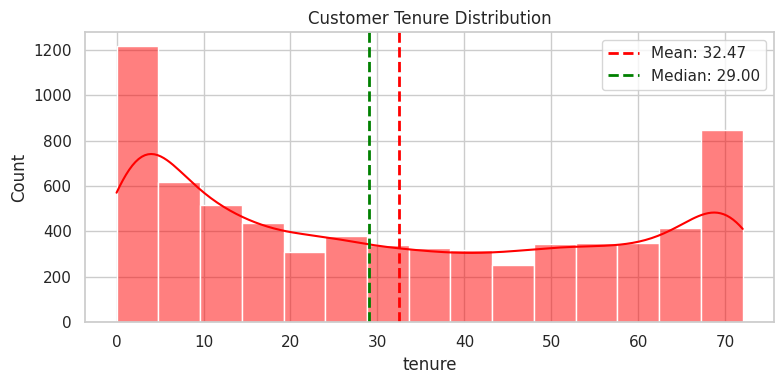

Total Charges Distribution
Mean: 32.47
Median: 29.00


In [ ]:
# Histogram for numerical variables
plt.figure(figsize=(8, 4))

# Set plot style
sns.set(style="whitegrid")

# Tenure Distribution
sns.histplot(df['tenure'], kde=True, color="red")
plt.title('Customer Tenure Distribution')

# mean median
col_mean = df['tenure'].mean()
col_median = df['tenure'].median()

# vertical lines of mean and median
plt.axvline(col_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {col_mean:.2f}')
plt.axvline(col_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {col_median:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print("Total Charges Distribution")
print(f"Mean: {col_mean:.2f}")
print(f"Median: {col_median:.2f}")

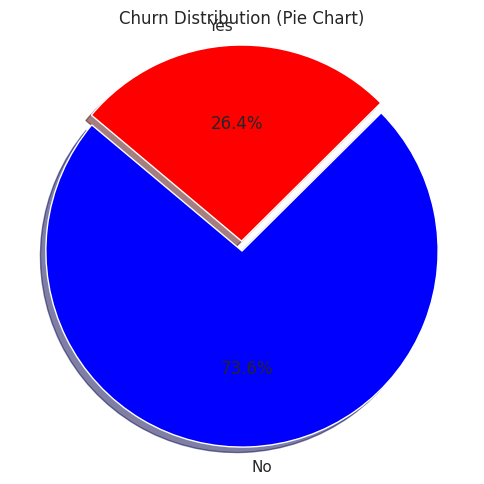

Churn Distribution in percentage: 
Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


In [ ]:
# Prepare data for pie chart
churn_counts = df['Churn'].value_counts()
churn_labels = churn_counts.index
churn_sizes = churn_counts.values

# Plot pie chart
plt.figure(figsize=(5, 5))
colors = ['blue', 'red']
explode = (0.05, 0)

plt.pie(
    churn_sizes,
    labels=churn_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True
)

plt.title('Churn Distribution (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# percentage distribution of Churn
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution in percentage: ")
print(churn_percentage)


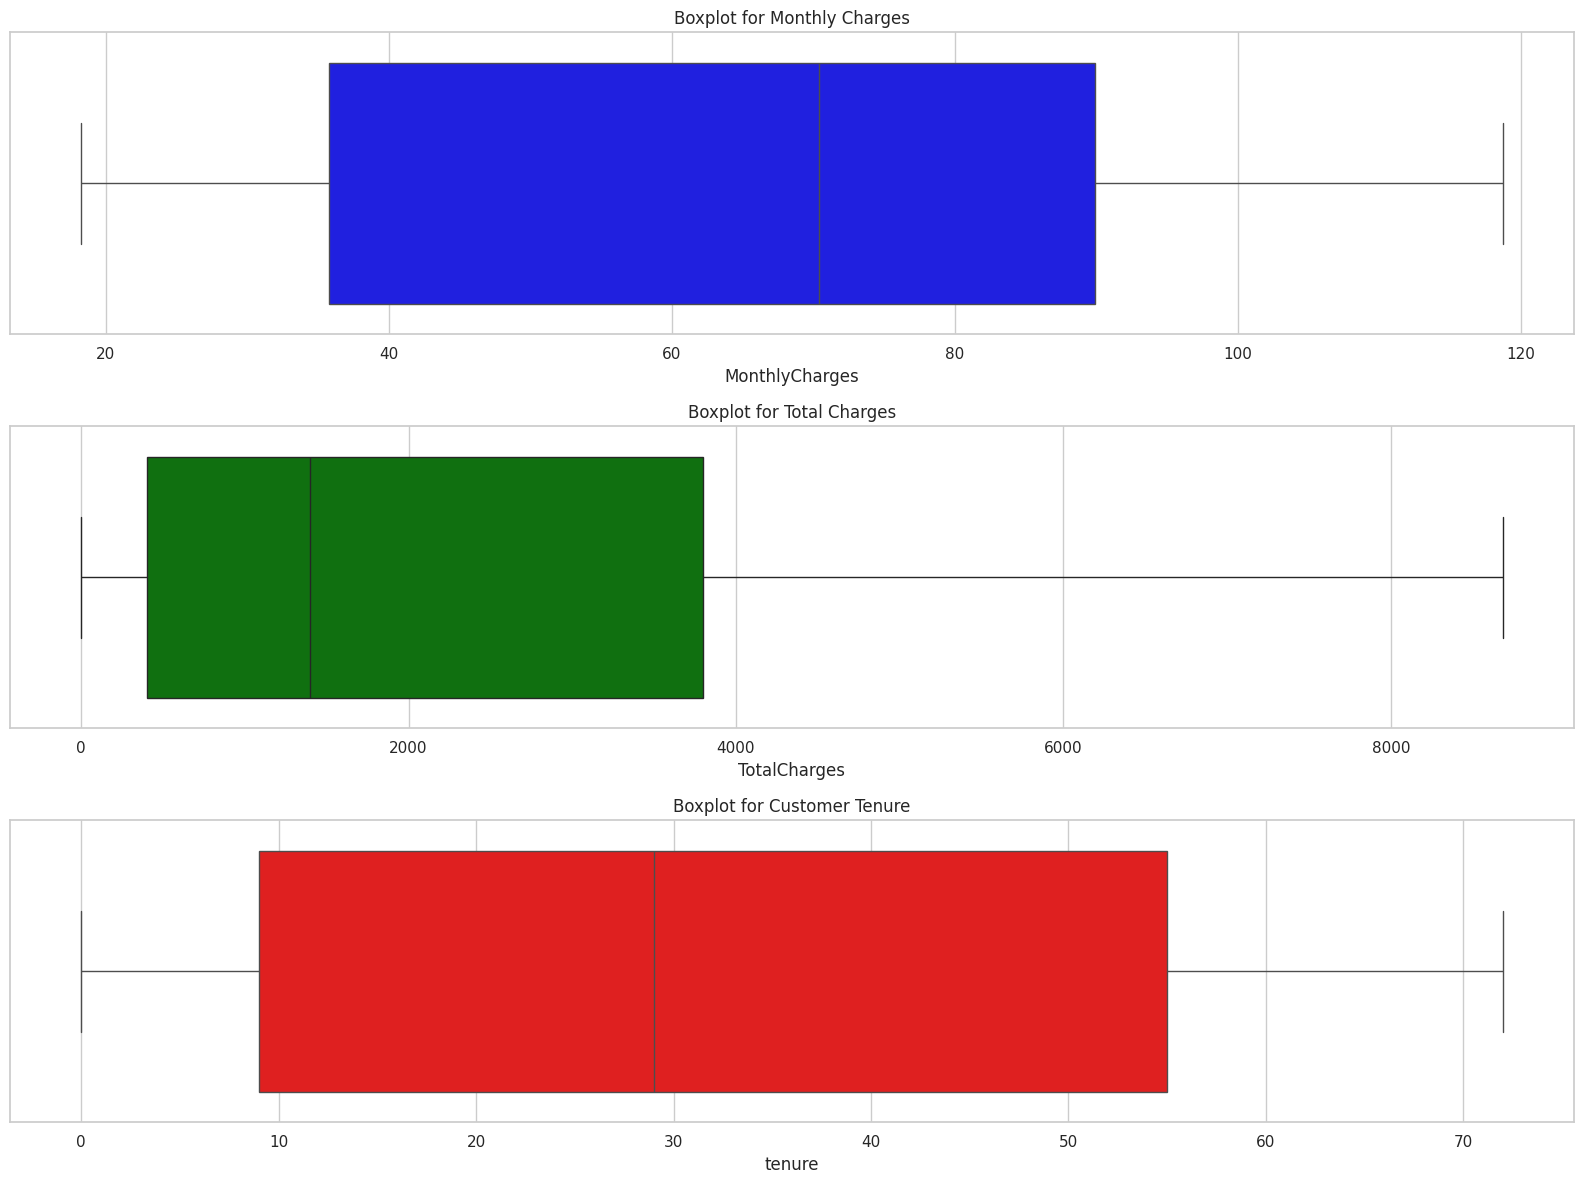

In [ ]:
# Box plot to find outliers

sns.set(style="whitegrid")

# figure  size
plt.figure(figsize=(16, 12))

# for MonthlyCharges
plt.subplot(3, 1, 1)
sns.boxplot(x=df['MonthlyCharges'], color='blue')
plt.title('Boxplot for Monthly Charges')

# for TotalCharges
plt.subplot(3, 1, 2)
sns.boxplot(x=df['TotalCharges'], color='green')
plt.title('Boxplot for Total Charges')

# for Tenure
plt.subplot(3, 1, 3)
sns.boxplot(x=df['tenure'], color='red')
plt.title('Boxplot for Customer Tenure')


plt.tight_layout()
plt.show()

In [ ]:
# for numeric features
numeric = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# correlation matrix
corr = df[numeric].corr()

In [ ]:
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015349,0.219434,0.102243
tenure,0.015349,1.000000,0.245251,0.825595
MonthlyCharges,0.219434,0.245251,1.000000,0.650653
TotalCharges,0.102243,0.825595,0.650653,1.000000


Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

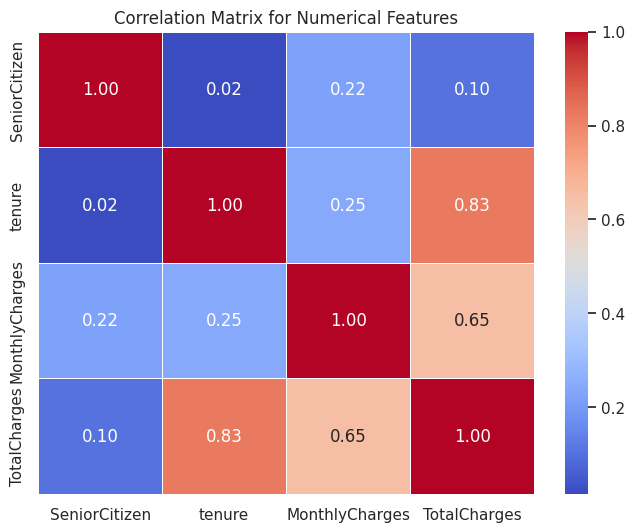

In [ ]:
# heat-map
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')

In [ ]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineBackup', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod']

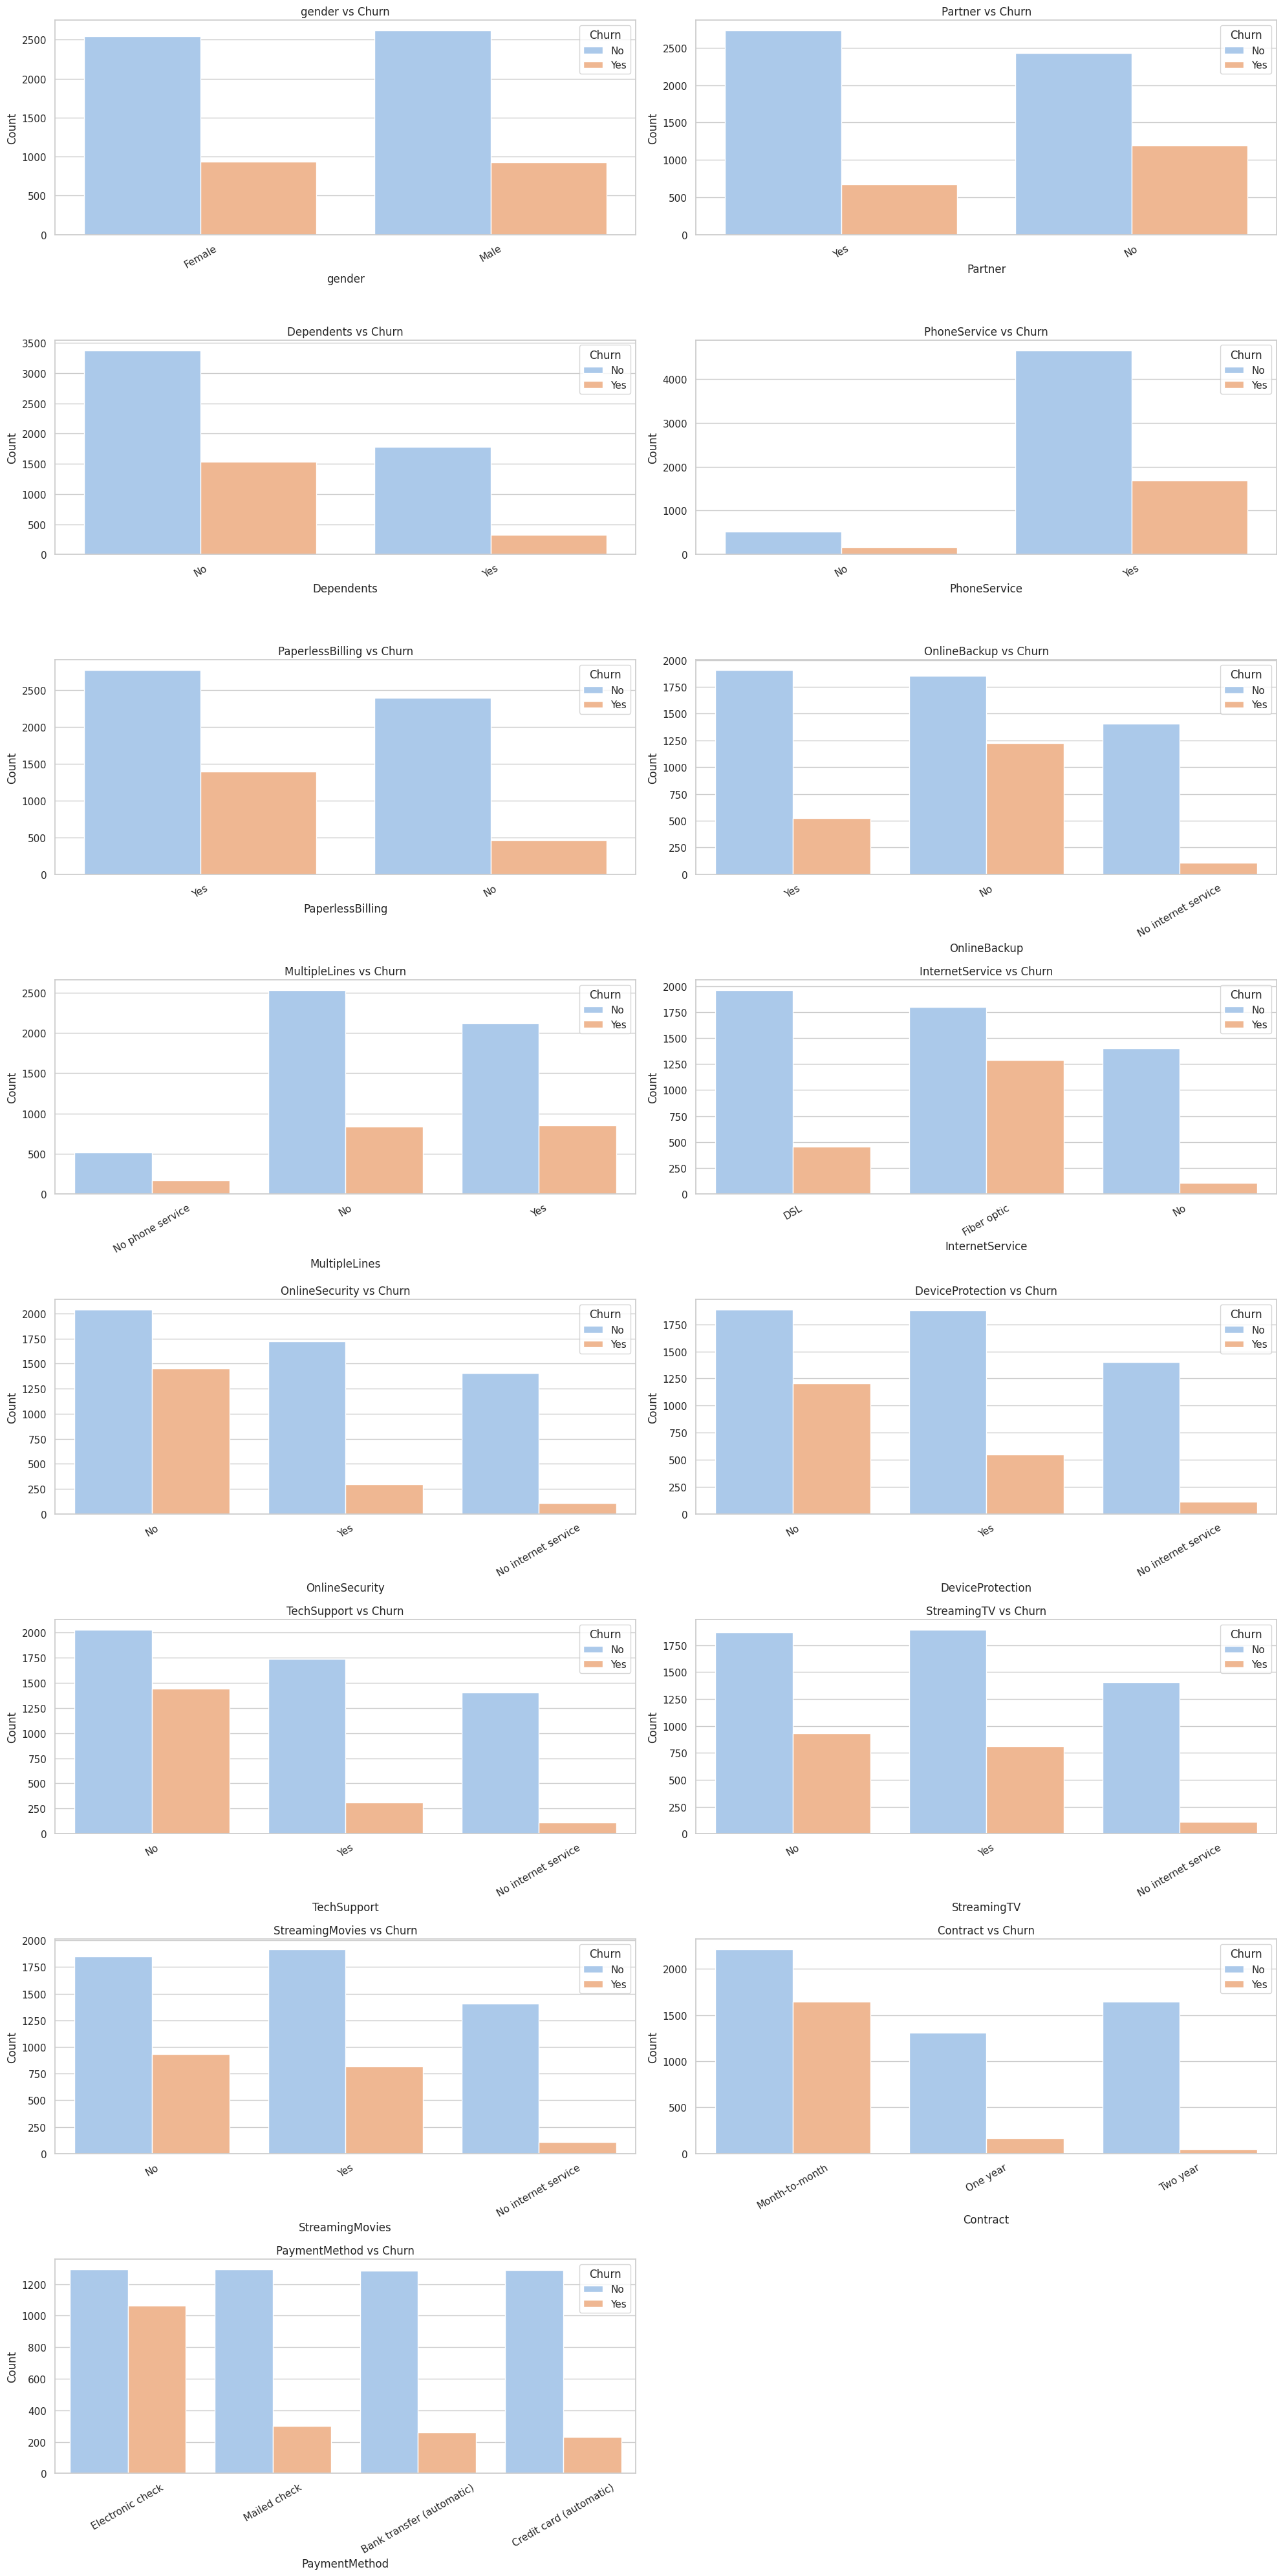

In [ ]:
plt.figure(figsize=(20, 40))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(8, 2, i)
    sns.countplot(data=df, x=feature, hue='Churn', palette='pastel')
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
df['SeniorCitizen'].dtype


dtype('int64')

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineBackup', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod']

In [ ]:
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
for col in categorical_features:
    print(f"{col} : {df[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
OnlineBackup : ['Yes' 'No' 'No internet service']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# collapse "no service" categories to "No"
no_internet_cols = ['OnlineBackup','OnlineSecurity','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies']
df[no_internet_cols] = df[no_internet_cols].replace({'No internet service':'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':'No'})

# binary maps
bin_map = {'Yes':1, 'No':0}
gender_map = {'Male':1, 'Female':0}

binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling',
               'MultipleLines','OnlineBackup','OnlineSecurity','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies']

for col in binary_cols:
    df[col] = df[col].map(bin_map).astype('int8')

df['gender'] = df['gender'].map(gender_map).astype('int8')

# SeniorCitizen is already 0/1 -> ensure integer type
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int8')

# Ordinal encode the contract length
contract_order = {'Month-to-month':0, 'One year':1, 'Two year':2}
df['Contract'] = df['Contract'].map(contract_order).astype('int8')

# One-hot encode
nominal_cols = ['InternetService','PaymentMethod']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [ ]:
print(df.dtypes.head(20))

gender                            int8
SeniorCitizen                     int8
Partner                           int8
Dependents                        int8
tenure                           int64
PhoneService                      int8
MultipleLines                     int8
OnlineSecurity                    int8
OnlineBackup                      int8
DeviceProtection                  int8
TechSupport                       int8
StreamingTV                       int8
StreamingMovies                   int8
Contract                          int8
PaperlessBilling                  int8
MonthlyCharges                 float64
TotalCharges                   float64
Churn                           object
InternetService_Fiber optic       bool
InternetService_No                bool
dtype: object


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,No,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,No,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,Yes,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,No,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,Yes,True,False,False,True,False


In [ ]:
# Churn map to 1/0
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype('int8')

In [ ]:
# Convert boolean columns → 1/0
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
if bool_cols:
    df[bool_cols] = df[bool_cols].astype('int8')

In [ ]:
print("Target counts:", df['Churn'].value_counts().to_dict())

Target counts: {0: 5164, 1: 1857}


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0


In [ ]:
print("Number of features:", X_train.shape[1])

NameError: name 'X_train' is not defined

In [ ]:
# train test splitting
X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (5616, 22)  Test shape: (1405, 22)


In [ ]:
# De-skew + Standardize
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

# pipe line for deskewing and standadizing
num_pipe = Pipeline(steps=[
    ('yj', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scaler', StandardScaler())
])

# fit on the train data -> transform train & test
X_train_proc = X_train.copy()
X_test_proc  = X_test.copy()

X_train_proc[numeric] = num_pipe.fit_transform(X_train[numeric])
X_test_proc[numeric]  = num_pipe.transform(X_test[numeric])


print("Scaled train means (≈0) & stds (≈1):")
print(X_train_proc[numeric].describe().loc[['mean','std']].round(3))


Scaled train means (≈0) & stds (≈1):
      tenure  MonthlyCharges  TotalCharges
mean     0.0             0.0           0.0
std      1.0             1.0           1.0


In [ ]:
# balancing the training set while keeping test data hided
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_proc, y_train)

print("Train class ratio before:", {k: round(v/len(y_train),3) for k,v in Counter(y_train).items()})
print("Train class ratio after :", {k: round(v/len(y_train_bal),3) for k,v in Counter(y_train_bal).items()})
print("Shapes of X_train_bal:", X_train_bal.shape, " X_test_proc:", X_test_proc.shape)


Train class ratio before: {1: 0.264, 0: 0.736}
Train class ratio after : {1: 0.5, 0: 0.5}
Shapes of X_train_bal: (8262, 22)  X_test_proc: (1405, 22)


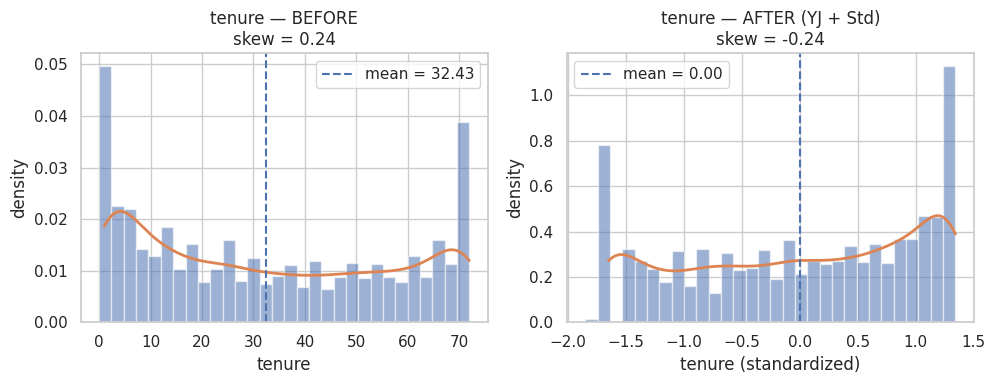

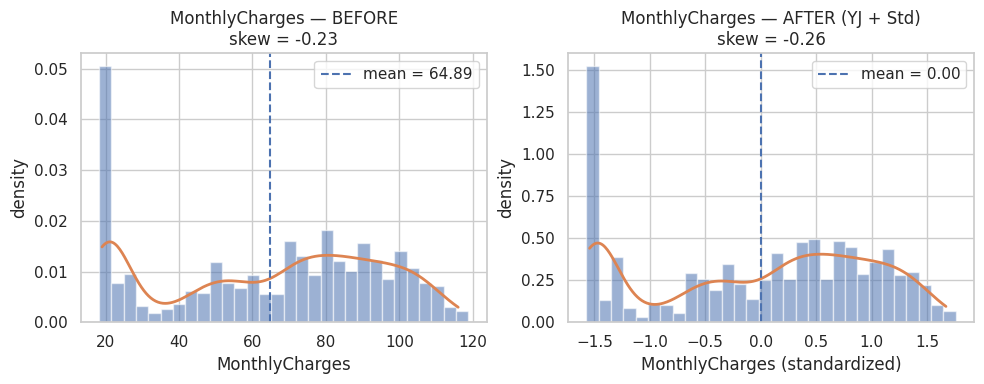

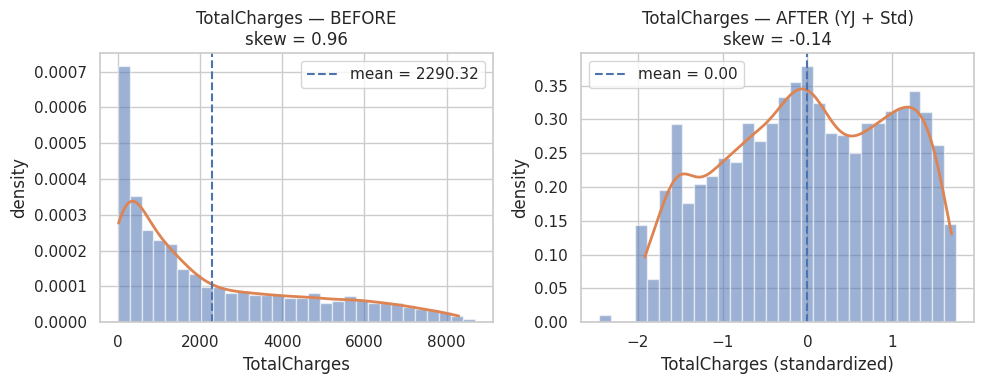

In [ ]:
def plot_before_after(col):
    data_b = X_train[col].dropna().values
    data_a = X_train_proc[col].dropna().values

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    for ax, data, tag in zip(axes, [data_b, data_a], ["BEFORE", "AFTER (YJ + Std)"]):
        ax.hist(data, bins=30, density=True, alpha=0.55)
        # kde curve
        xs = np.linspace(np.percentile(data, 0.5), np.percentile(data, 99.5), 300)
        try:
            kde = gaussian_kde(data)
            ax.plot(xs, kde(xs), linewidth=2)
        except Exception:
            pass
        ax.axvline(data.mean(), linestyle="--", linewidth=1.5, label=f"mean = {data.mean():.2f}")
        ax.set_title(f"{col} — {tag}\nskew = {skew(data):.2f}")
        ax.set_xlabel(col if tag=="BEFORE" else f"{col} (standardized)")
        ax.set_ylabel("density")
        ax.legend()
    plt.tight_layout()
    plt.show()

for c in numeric:
    plot_before_after(c)


In [ ]:
# have function to call evalutation for the models
def eval_model(clf, Xtr, ytr, Xte, yte, name):
    clf.fit(Xtr, ytr)
    y_pred = clf.predict(Xte)
    # Scores for ROC-AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(Xte)[:, 1]
    else:
        y_score = clf.decision_function(Xte)
    return {
        "Model": name,
        "Accuracy": accuracy_score(yte, y_pred),
        "F1": f1_score(yte, y_pred),
        "ROC_AUC": roc_auc_score(yte, y_score),
        "Num_Features": Xtr.shape[1]
    }

baseline_results = []

baseline_results.append(
    eval_model(LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs"),
               X_train, y_train, X_test, y_test, "LogisticRegression")
)

baseline_results.append(
    eval_model(SVC(kernel="rbf", C=1.0, probability=True, class_weight="balanced", random_state=42),
               X_train, y_train, X_test, y_test, "SVM (RBF)")
)

baseline_results.append(
    eval_model(RidgeClassifier(class_weight="balanced", random_state=42),
               X_train, y_train, X_test, y_test, "RidgeClassifier")
)

baseline_df = pd.DataFrame(baseline_results).sort_values("ROC_AUC", ascending=False)
display(baseline_df)


,Model,Accuracy,F1,ROC_AUC,Num_Features
0,LogisticRegression,0.741637,0.615058,0.839827,22
2,RidgeClassifier,0.731673,0.603575,0.837790,22
1,SVM (RBF),0.685409,0.489607,0.731399,22


,Correlation
InternetService_Fiber optic,0.308170
PaymentMethod_Electronic check,0.301544
MonthlyCharges,0.194508
PaperlessBilling,0.190891
SeniorCitizen,0.151619
StreamingTV,0.065032
StreamingMovies,0.063192
MultipleLines,0.041958
PhoneService,0.011323
gender,-0.008763


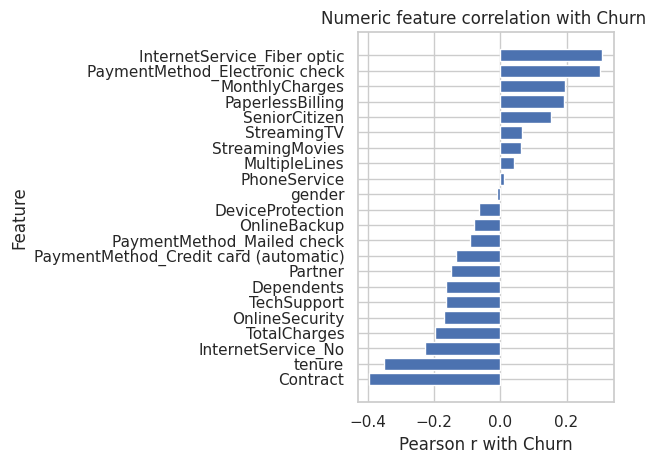

In [ ]:
# only for the numeric original columns
num_cols = df.drop(columns=["Churn"]).select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 0:
    corr = df[num_cols].apply(lambda col: col.corr(df["Churn"]))
    corr_df = corr.dropna().sort_values(ascending=False).to_frame("Correlation")
    display(corr_df.head(22))

    head = corr_df.head(22)
    plt.figure()
    plt.barh(head.index[::-1], head["Correlation"].values[::-1])
    plt.title("Numeric feature correlation with Churn ")
    plt.xlabel("Pearson r with Churn")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


MI:


,Feature,MI
13,Contract,0.099007
4,tenure,0.079286
17,InternetService_Fiber optic,0.056528
16,TotalCharges,0.042582
20,PaymentMethod_Electronic check,0.041007
15,MonthlyCharges,0.038856
18,InternetService_No,0.037869
14,PaperlessBilling,0.027061
7,OnlineSecurity,0.024479
3,Dependents,0.020058


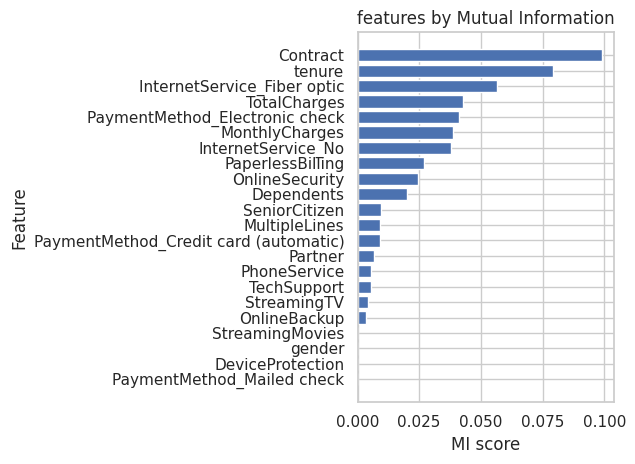

Selected 22 MI features


In [ ]:
# Mutual Information -> linear + non-linear dependencies
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_df = pd.DataFrame({"Feature": X_train.columns, "MI": mi_scores}).sort_values("MI", ascending=False)

print("MI:")
display(mi_df.head(22))

plt.figure()
topk = min(22, len(mi_df))
plt.barh(mi_df.head(topk)["Feature"][::-1], mi_df.head(topk)["MI"][::-1])
plt.title("features by Mutual Information")
plt.xlabel("MI score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

K_MI = min(22, len(mi_df))   # you can fine-tune K
mi_selected = mi_df.head(K_MI)["Feature"].tolist()
print(f"Selected {len(mi_selected)} MI features")


In [ ]:
K_MI = 10
mi_selected = mi_df.head(K_MI)["Feature"].tolist()
print("Selected MI features:", mi_selected)

Selected MI features: ['Contract', 'tenure', 'InternetService_Fiber optic', 'TotalCharges', 'PaymentMethod_Electronic check', 'MonthlyCharges', 'InternetService_No', 'PaperlessBilling', 'OnlineSecurity', 'Dependents']


In [ ]:
for x in mi_selected:
  print(x)

Contract
tenure
InternetService_Fiber optic
TotalCharges
PaymentMethod_Electronic check
MonthlyCharges
InternetService_No
PaperlessBilling
OnlineSecurity
Dependents


RF importance:


,Feature,Importance
16,TotalCharges,0.175631
15,MonthlyCharges,0.169347
4,tenure,0.158236
13,Contract,0.109605
17,InternetService_Fiber optic,0.049339
20,PaymentMethod_Electronic check,0.037060
14,PaperlessBilling,0.025717
0,gender,0.024926
7,OnlineSecurity,0.022878
10,TechSupport,0.022163


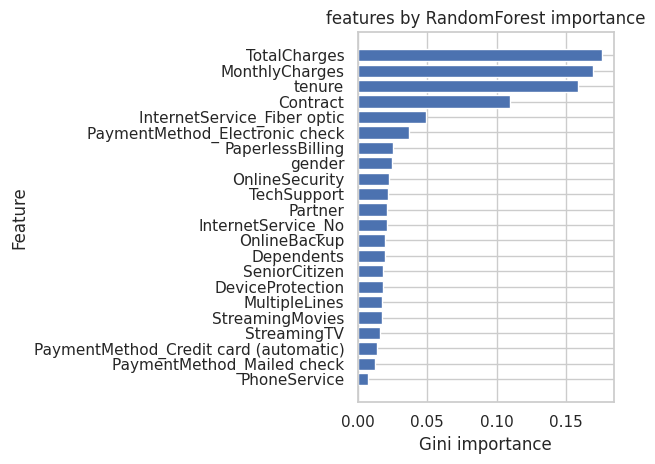

Selected 21 RF-importance features (threshold=0.010766)


In [ ]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
rf_imp = rf.feature_importances_

rf_df = pd.DataFrame({"Feature": X_train.columns, "Importance": rf_imp}).sort_values("Importance", ascending=False)

print("RF importance:")
display(rf_df.head(22))

plt.figure()
topn = min(22, len(rf_df))
plt.barh(rf_df.head(topn)["Feature"][::-1], rf_df.head(topn)["Importance"][::-1])
plt.title("features by RandomForest importance")
plt.xlabel("Gini importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Keeping features above the robust threshold - 0.5 * median of non-zero importances
nz = rf_df.loc[rf_df["Importance"] > 0, "Importance"]
thr = 0.5 * nz.median() if len(nz) else 0.0
rf_selected = rf_df.loc[rf_df["Importance"] >= thr, "Feature"].tolist()
print(f"Selected {len(rf_selected)} RF-importance features (threshold={thr:.6f})")

In [ ]:
for fea in selected_features_rf:
    print(fea)

NameError: name 'selected_features_rf' is not defined

In [ ]:
# Normalizing
rf_df["Importance"] = rf_df["Importance"] / rf_df["Importance"].sum()

# cumulative importance
rf_df["Cumulative"] = rf_df["Importance"].cumsum()

display(rf_df.head(15))


,Feature,Importance,Cumulative
16,TotalCharges,0.175631,0.175631
15,MonthlyCharges,0.169347,0.344978
4,tenure,0.158236,0.503214
13,Contract,0.109605,0.612820
17,InternetService_Fiber optic,0.049339,0.662158
20,PaymentMethod_Electronic check,0.037060,0.699218
14,PaperlessBilling,0.025717,0.724935
0,gender,0.024926,0.749861
7,OnlineSecurity,0.022878,0.772739
10,TechSupport,0.022163,0.794902


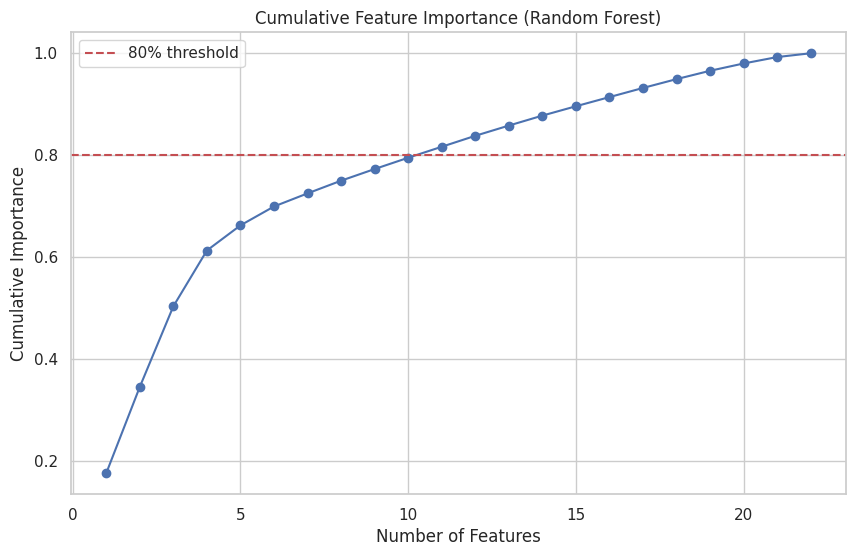

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(rf_df)+1), rf_df["Cumulative"], marker="o")
plt.axhline(y=0.80, color="r", linestyle="--", label="80% threshold")
plt.title("Cumulative Feature Importance (Random Forest)")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.show()


In [ ]:
# Select features where cumulative <= 80%
threshold = 0.80
rf_selected_cum = rf_df.loc[rf_df["Cumulative"] <= threshold, "Feature"].tolist()

print(f"Selected {len(rf_selected_cum)} features (covering {threshold*100:.0f}% of importance):")
print(rf_selected_cum)


Selected 10 features (covering 80% of importance):
['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'PaperlessBilling', 'gender', 'OnlineSecurity', 'TechSupport']


In [ ]:
for fea in rf_selected_cum:
  print(fea)

TotalCharges
MonthlyCharges
tenure
Contract
InternetService_Fiber optic
PaymentMethod_Electronic check
PaperlessBilling
gender
OnlineSecurity
TechSupport


In [ ]:
def eval_on_feature_set(Xtr, Xte, ytr, yte, feat_list, tag):
    rows = []
    models = [
        ("LogisticRegression", LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs")),
        ("SVM (RBF)",          SVC(kernel="rbf", C=1.0, probability=True, class_weight="balanced", random_state=42)),
        ("RidgeClassifier",    RidgeClassifier(class_weight="balanced", random_state=42)),
    ]
    for name, clf in models:
        rows.append(eval_model(clf, Xtr[feat_list], ytr, Xte[feat_list], yte, f"{name} | {tag}"))
    return rows

after_rows = []
# ALL - reference
after_rows += eval_on_feature_set(X_train, X_test, y_train, y_test, X_train.columns.tolist(), "ALL")
# MI subset
after_rows += eval_on_feature_set(X_train, X_test, y_train, y_test, mi_selected, "MI-selected")
# RF subset
after_rows += eval_on_feature_set(X_train, X_test, y_train, y_test, rf_selected, "RF-selected")
# RF subset
after_rows += eval_on_feature_set(X_train, X_test, y_train, y_test, rf_selected_cum, "RF-selected-cum")

after_df = pd.DataFrame(after_rows)
display(after_df.sort_values(["Model","ROC_AUC"], ascending=[True, False]))


,Model,Accuracy,F1,ROC_AUC,Num_Features
0,LogisticRegression | ALL,0.741637,0.615058,0.839827,22
3,LogisticRegression | MI-selected,0.738078,0.613445,0.835976,10
6,LogisticRegression | RF-selected,0.738790,0.612460,0.839908,21
9,LogisticRegression | RF-selected-cum,0.740214,0.610459,0.835485,10
2,RidgeClassifier | ALL,0.731673,0.603575,0.837790,22
5,RidgeClassifier | MI-selected,0.730249,0.607254,0.832668,10
8,RidgeClassifier | RF-selected,0.730961,0.602105,0.837792,21
11,RidgeClassifier | RF-selected-cum,0.730961,0.602941,0.833182,10
1,SVM (RBF) | ALL,0.685409,0.489607,0.731399,22
4,SVM (RBF) | MI-selected,0.685409,0.489607,0.732446,10


In [ ]:
split = after_df["Model"].str.split(" \\| ", expand=True)
tidy = after_df.copy()
tidy["BaseModel"] = split[0]
tidy["FeatureSet"] = split[1]

pivot = tidy.pivot_table(index="BaseModel", columns="FeatureSet",
                         values=["Num_Features","Accuracy","F1","ROC_AUC"])
display(pivot)

Accuracy                                          \
FeatureSet               ALL MI-selected RF-selected RF-selected-cum   
BaseModel                                                              
LogisticRegression  0.741637    0.738078    0.738790        0.740214   
RidgeClassifier     0.731673    0.730249    0.730961        0.730961   
SVM (RBF)           0.685409    0.685409    0.685409        0.685409   

                          F1                                          \
FeatureSet               ALL MI-selected RF-selected RF-selected-cum   
BaseModel                                                              
LogisticRegression  0.615058    0.613445    0.612460        0.610459   
RidgeClassifier     0.603575    0.607254    0.602105        0.602941   
SVM (RBF)           0.489607    0.489607    0.489607        0.489607   

                   Num_Features                                          \
FeatureSet                  ALL MI-selected RF-selected RF-selected-cum   
BaseModel                                                                 
LogisticRegression         22.0        10.0        21.0            10.0   
RidgeClassifier            22.0        10.0        21.0            10.0   
SVM (RBF)                  22.0        10.0        21.0            10.0   

                     ROC_AUC                                          
FeatureSet               ALL MI-selected RF-selected RF-selected-cum  
BaseModel                                                             
LogisticRegression  0.839827    0.835976    0.839908        0.835485  
RidgeClassifier     0.837790    0.832668    0.837792        0.833182  
SVM (RBF)           0.731399    0.732446    0.731469        0.732526

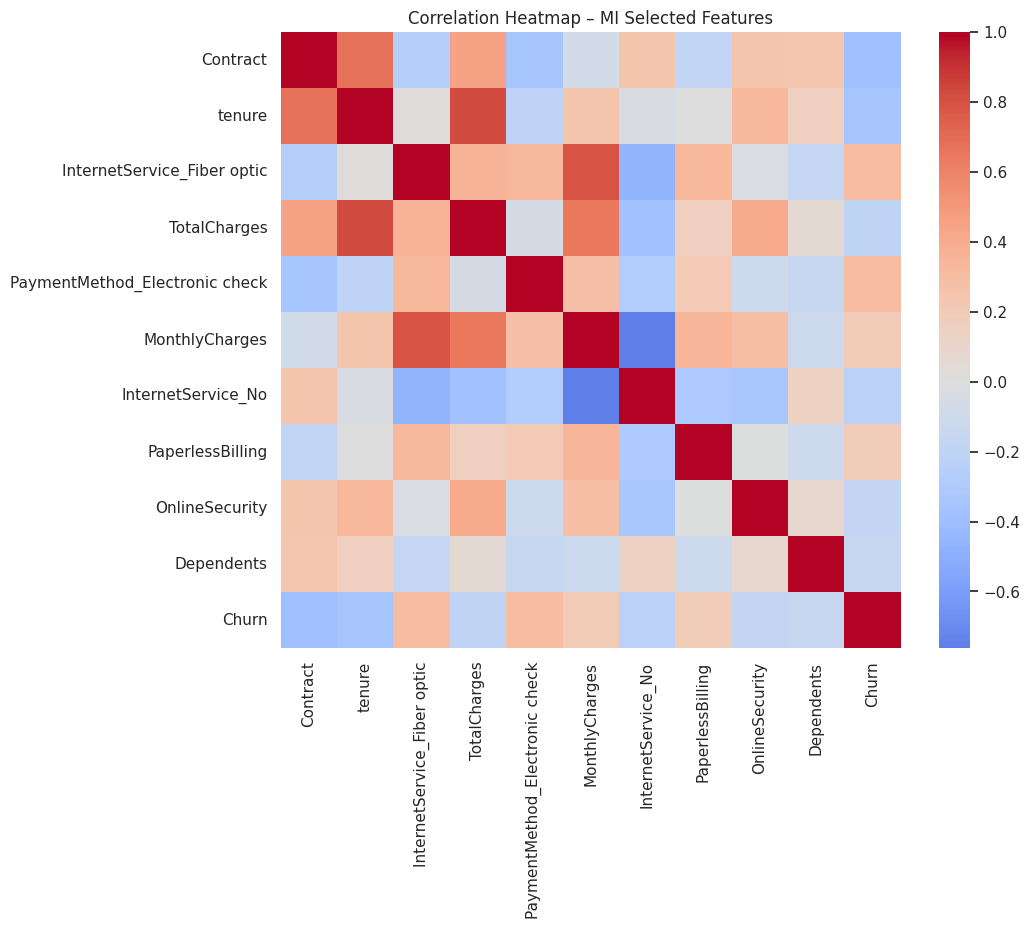

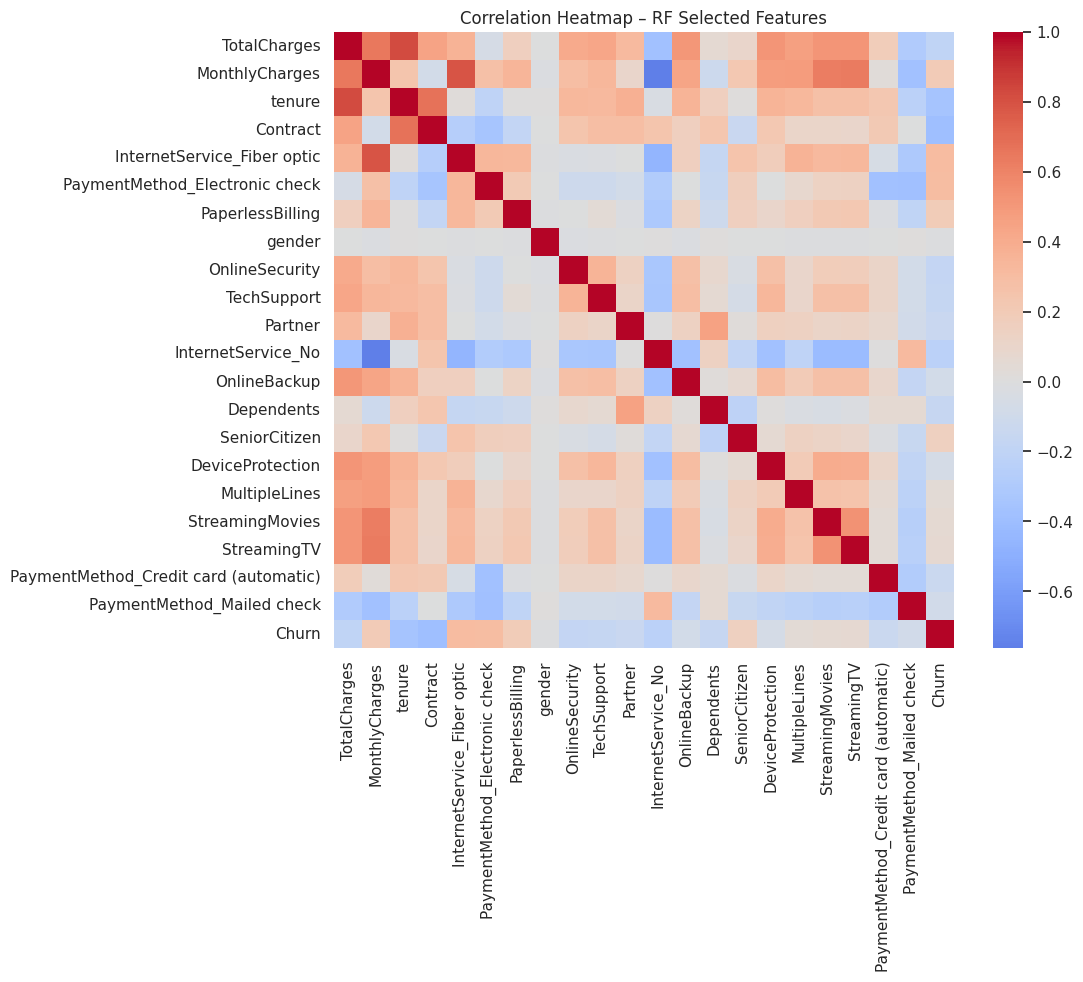

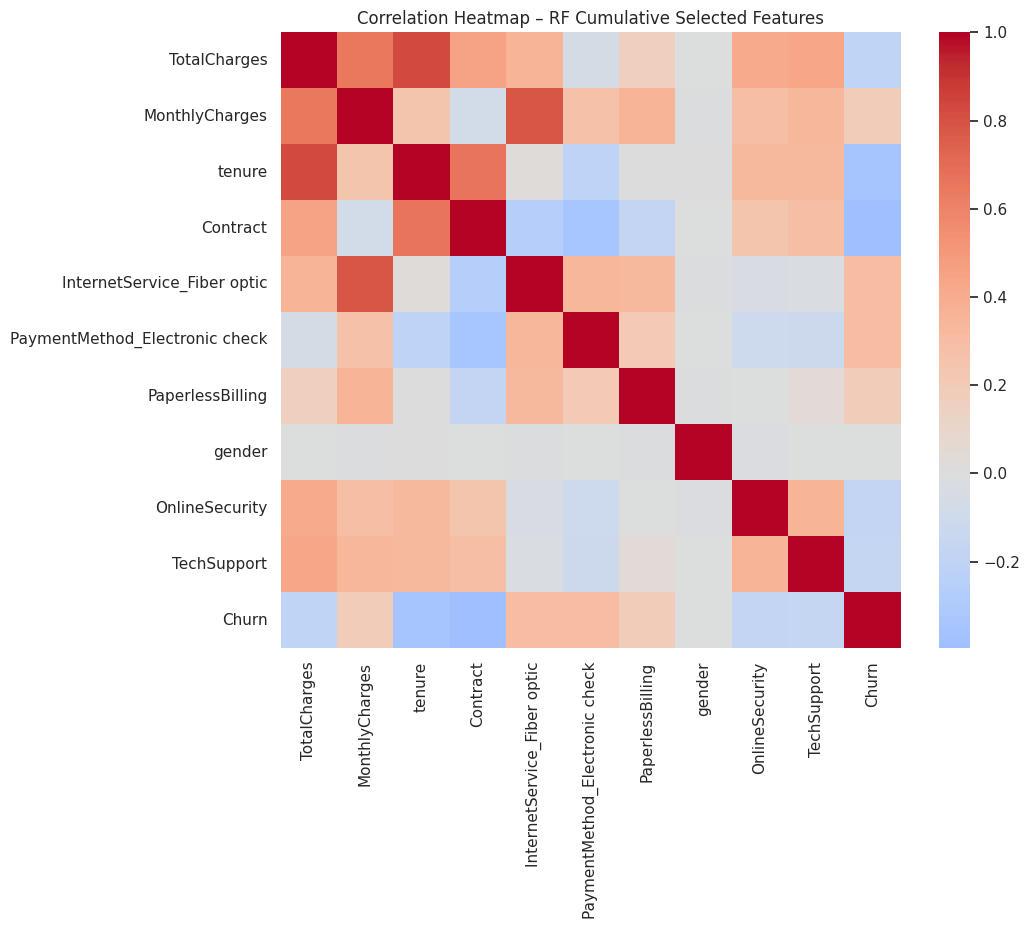

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for MI-selected features
mi_corr = df[mi_selected + ["Churn"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(mi_corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap – MI Selected Features")
plt.show()

# heatmap for RF selected features
rf_corr = df[rf_selected + ["Churn"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(rf_corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap – RF Selected Features")
plt.show()

# Correlation heatmap for RF cumulative-selected features
rf_corr = df[rf_selected_cum + ["Churn"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(rf_corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap – RF Cumulative Selected Features")
plt.show()


# Final


In [ ]:
# Selected the rf_selected_cum as feature selection
feature_sets = {
    "RF-selected-cum": rf_selected_cum
}

In [ ]:
# ensuring all selected features exist in X_train_proc
for k, v in feature_sets.items():
    missing = [f for f in v if f not in X_train_proc.columns]
    if missing:
        print(f"[WARNING] {len(missing)} features not found in X_train_proc for {k}: {missing}")
    # keep only valid ones
    feature_sets[k] = [f for f in v if f in X_train_proc.columns]
    print(f"[INFO] {k} -> using {len(feature_sets[k])} features")


[INFO] RF-selected-cum -> using 10 features


In [ ]:
# models and grids
models_grids = [
    ("LogisticRegression", LogisticRegression(max_iter=3000, solver="lbfgs", class_weight="balanced"),
     {"C":[0.01,0.1,1,3]}),

    ("RidgeClassifier", RidgeClassifier(class_weight="balanced"),
     {"alpha":[0.1,1,5,10]}),

    ("LinearSVC", LinearSVC(class_weight="balanced", max_iter=5000),
     {"C":[0.01,0.1,1,3]}),

    ("SVM-RBF", SVC(kernel="rbf", probability=True, class_weight="balanced"),
     {"C":[0.5,1,3], "gamma":["scale","auto"]}),

    ("KNN", KNeighborsClassifier(),
     {"n_neighbors":[3,5,7,11], "weights":["uniform","distance"]}),

    ("DecisionTree", DecisionTreeClassifier(random_state=42, class_weight="balanced"),
     {"max_depth":[None,5,10,20], "min_samples_split":[2,10,50]}),

    ("RandomForest", RandomForestClassifier(random_state=42, class_weight="balanced"),
     {"n_estimators":[200,400], "max_depth":[None,10,20]}),

    ("ExtraTrees", ExtraTreesClassifier(random_state=42, class_weight="balanced"),
     {"n_estimators":[200,400], "max_depth":[None,10,20]}),

    ("AdaBoost", AdaBoostClassifier(random_state=42),
     {"n_estimators":[100,300], "learning_rate":[0.05,0.1,0.5,1.0]}),

    ("GradientBoosting", GradientBoostingClassifier(random_state=42),
     {"n_estimators":[150,300], "learning_rate":[0.05,0.1], "max_depth":[2,3]}),

    ("GaussianNB", GaussianNB(),  # no grid needed, keep empty
     {}),

    ("MLP", MLPClassifier(max_iter=400, random_state=42),
     {"hidden_layer_sizes":[(64,), (128,), (64,32)], "alpha":[1e-4,1e-3]})

]

In [ ]:
# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Evaluation Scores
scoring = {"acc":"accuracy", "prec":"precision", "rec":"recall", "f1":"f1", "auc":"roc_auc"}

In [ ]:
all_rows = []

In [ ]:
for fset_name, feats in feature_sets.items():
    Xtr = X_train_bal[feats]
    ytr = y_train_bal

    for mdl_name, base_mdl, grid in models_grids :
        print(f"\n>>> {mdl_name} on {fset_name} ({len(feats)} feats) — tuning...")

        if grid:
            gs = GridSearchCV(base_mdl, grid, scoring="f1", cv=cv, n_jobs=-1, refit=True)
            gs.fit(Xtr, ytr)
            best = gs.best_estimator_
            best_params = gs.best_params_
        else:
            base_mdl.fit(Xtr, ytr)
            best = base_mdl
            best_params = {}

        cv_res = cross_validate(best, Xtr, ytr, cv=cv, scoring=scoring, n_jobs=-1)
        row = {
            "Model": mdl_name,
            "FeatureSet": fset_name,
            "n_features": len(feats),
            "cv_acc":  cv_res["test_acc"].mean(),
            "cv_prec": cv_res["test_prec"].mean(),
            "cv_rec":  cv_res["test_rec"].mean(),
            "cv_f1":   cv_res["test_f1"].mean(),
            "cv_auc":  cv_res["test_auc"].mean(),
            "best_params": best_params
        }
        all_rows.append(row)


>>> LogisticRegression on RF-selected-cum (10 feats) — tuning...

>>> RidgeClassifier on RF-selected-cum (10 feats) — tuning...

>>> LinearSVC on RF-selected-cum (10 feats) — tuning...

>>> SVM-RBF on RF-selected-cum (10 feats) — tuning...

>>> KNN on RF-selected-cum (10 feats) — tuning...

>>> DecisionTree on RF-selected-cum (10 feats) — tuning...

>>> RandomForest on RF-selected-cum (10 feats) — tuning...

>>> ExtraTrees on RF-selected-cum (10 feats) — tuning...

>>> AdaBoost on RF-selected-cum (10 feats) — tuning...

>>> GradientBoosting on RF-selected-cum (10 feats) — tuning...

>>> GaussianNB on RF-selected-cum (10 feats) — tuning...

>>> MLP on RF-selected-cum (10 feats) — tuning...


In [ ]:
cv_table = pd.DataFrame(all_rows).sort_values(["cv_f1","cv_auc","cv_acc"], ascending=False)
print("\n=== Cross-validated comparison (sorted by F1, then AUC, then ACC) ===")
display(cv_table.head(20))


=== Cross-validated comparison (sorted by F1, then AUC, then ACC) ===


,Model,FeatureSet,n_features,cv_acc,cv_prec,cv_rec,cv_f1,cv_auc,best_params
7,ExtraTrees,RF-selected-cum,10,0.898936,0.862625,0.949163,0.903750,0.971216,"{'max_depth': 20, 'n_estimators': 400}"
6,RandomForest,RF-selected-cum,10,0.895425,0.852946,0.955699,0.901367,0.959463,"{'max_depth': None, 'n_estimators': 400}"
5,DecisionTree,RF-selected-cum,10,0.874848,0.827056,0.948195,0.883428,0.876501,"{'max_depth': None, 'min_samples_split': 2}"
4,KNN,RF-selected-cum,10,0.851490,0.789435,0.958847,0.865887,0.914786,"{'n_neighbors': 3, 'weights': 'distance'}"
9,GradientBoosting,RF-selected-cum,10,0.804285,0.777560,0.852819,0.813353,0.878832,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
11,MLP,RF-selected-cum,10,0.790366,0.768899,0.831044,0.798417,0.866118,"{'alpha': 0.0001, 'hidden_layer_sizes': (64, 32)}"
3,SVM-RBF,RF-selected-cum,10,0.778143,0.758260,0.817237,0.786489,0.838791,"{'C': 3, 'gamma': 'scale'}"
8,AdaBoost,RF-selected-cum,10,0.766038,0.728111,0.849674,0.784133,0.845387,"{'learning_rate': 0.1, 'n_estimators': 100}"
0,LogisticRegression,RF-selected-cum,10,0.769064,0.751582,0.804166,0.776933,0.849344,{'C': 0.01}
10,GaussianNB,RF-selected-cum,10,0.763498,0.735153,0.823777,0.776925,0.841627,{}


In [ ]:
# Picking up the top model
top = cv_table.iloc[0]
top_model_name   = top["Model"]
top_featset_name = top["FeatureSet"]
top_params       = top["best_params"]
print(f"\nSelected: {top_model_name} on {top_featset_name} with params {top_params}")


Selected: ExtraTrees on RF-selected-cum with params {'max_depth': 20, 'n_estimators': 400}


In [ ]:
def make_estimator(name, params):
    for mdl_name, base_mdl, grid in models_grids:
        if mdl_name == name:
            est = base_mdl.__class__(**base_mdl.get_params())
            est.set_params(**params)
            return est
    raise ValueError("Model not found")

In [ ]:
final_feats = feature_sets[top_featset_name]
final_est   = make_estimator(top_model_name, top_params)

In [ ]:
final_est.fit(X_train_bal[final_feats], y_train_bal)
y_pred_test = final_est.predict(X_test_proc[final_feats])

In [ ]:
if hasattr(final_est, "predict_proba"):
    y_score_test = final_est.predict_proba(X_test_proc[final_feats])[:,1]
elif hasattr(final_est, "decision_function"):
    y_score_test = final_est.decision_function(X_test_proc[final_feats])
else:
    y_score_test = None

acc  = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec  = recall_score(y_test, y_pred_test)
f1   = f1_score(y_test, y_pred_test)
auc  = roc_auc_score(y_test, y_score_test) if y_score_test is not None else float("nan")
cm   = confusion_matrix(y_test, y_pred_test)

print("\n=== FINAL TEST EVALUATION ===")
print(f"Model:      {top_model_name}")
print(f"FeatureSet: {top_featset_name} ({len(final_feats)} features)")
print(f"Accuracy:   {acc:.4f}")
print(f"Precision:  {prec:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1-score:   {f1:.4f}")
print(f"ROC-AUC:    {auc:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred_test, digits=3))


=== FINAL TEST EVALUATION ===
Model:      ExtraTrees
FeatureSet: RF-selected-cum (10 features)
Accuracy:   0.7772
Precision:  0.5891
Recall:     0.5242
F1-score:   0.5548
ROC-AUC:    0.8095
Confusion matrix [TN FP; FN TP]:
 [[897 136]
 [177 195]]

Classification report:
               precision    recall  f1-score   support

           0      0.835     0.868     0.851      1033
           1      0.589     0.524     0.555       372

    accuracy                          0.777      1405
   macro avg      0.712     0.696     0.703      1405
weighted avg      0.770     0.777     0.773      1405



In [ ]:
pd.Series(final_feats, name="Final Features").to_frame().style.hide(axis="columns")

0,TotalCharges
1,MonthlyCharges
2,tenure
3,Contract
4,InternetService_Fiber optic
5,PaymentMethod_Electronic check
6,PaperlessBilling
7,gender
8,OnlineSecurity
9,TechSupport


In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# final feature set
Xtr = X_train_bal[rf_selected_cum]
ytr = y_train_bal
Xte = X_test_proc[rf_selected_cum]

# Defining base learners
lr  = LogisticRegression(max_iter=3000, solver="lbfgs", class_weight="balanced", C=1.0)
rf  = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
gb  = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
xgb = XGBClassifier(
    n_estimators=300, learning_rate=0.1, max_depth=4,
    subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1,
    use_label_encoder=False, eval_metric="logloss", random_state=42
)

# VotingClassifier
voting = VotingClassifier(
    estimators=[("lr", lr), ("rf", rf), ("gb", gb), ("xgb", xgb)],
    voting="soft"  # probability averaging
)

voting.fit(Xtr, ytr)
y_pred_v = voting.predict(Xte)
y_proba_v = voting.predict_proba(Xte)[:,1]

print("\n=== VOTING CLASSIFIER RESULTS ===")
print("Accuracy :", accuracy_score(y_test, y_pred_v))
print("Precision:", precision_score(y_test, y_pred_v))
print("Recall   :", recall_score(y_test, y_pred_v))
print("F1-score :", f1_score(y_test, y_pred_v))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_v))
print("Confusion:\n", confusion_matrix(y_test, y_pred_v))

# StackingClassifier
stacking = StackingClassifier(
    estimators=[("lr", lr), ("rf", rf), ("gb", gb), ("xgb", xgb)],
    final_estimator=LogisticRegression(max_iter=2000),
    passthrough=False, cv=5, n_jobs=-1
)

stacking.fit(Xtr, ytr)
y_pred_s = stacking.predict(Xte)
y_proba_s = stacking.predict_proba(Xte)[:,1]

print("\n=== STACKING CLASSIFIER RESULTS ===")
print("Accuracy :", accuracy_score(y_test, y_pred_s))
print("Precision:", precision_score(y_test, y_pred_s))
print("Recall   :", recall_score(y_test, y_pred_s))
print("F1-score :", f1_score(y_test, y_pred_s))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_s))
print("Confusion:\n", confusion_matrix(y_test, y_pred_s))



=== VOTING CLASSIFIER RESULTS ===
Accuracy : 0.7743772241992882
Precision: 0.55741127348643
Recall   : 0.717741935483871
F1-score : 0.627497062279671
ROC-AUC  : 0.8392067160062039
Confusion:
 [[821 212]
 [105 267]]

=== STACKING CLASSIFIER RESULTS ===
Accuracy : 0.7765124555160142
Precision: 0.6228813559322034
Recall   : 0.3951612903225806
F1-score : 0.48355263157894735
ROC-AUC  : 0.789497652728768
Confusion:
 [[944  89]
 [225 147]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Getting train-level probabilities
p_voting_train   = voting.predict_proba(Xtr)[:,1]
p_stacking_train = stacking.predict_proba(Xtr)[:,1]

blend_X_train = np.column_stack([p_voting_train, p_stacking_train])

# Training meta-learner
meta = LogisticRegression()
meta.fit(blend_X_train, ytr)

# Prediction on test set
p_voting_test   = voting.predict_proba(Xte)[:,1]
p_stacking_test = stacking.predict_proba(Xte)[:,1]
blend_X_test = np.column_stack([p_voting_test, p_stacking_test])

y_pred_blend = meta.predict(blend_X_test)
y_proba_blend = meta.predict_proba(blend_X_test)[:,1]

# Evaluation
print("Accuracy :", accuracy_score(y_test, y_pred_blend))
print("Precision:", precision_score(y_test, y_pred_blend))
print("Recall   :", recall_score(y_test, y_pred_blend))
print("F1-score :", f1_score(y_test, y_pred_blend))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_blend))
print("Confusion:\n", confusion_matrix(y_test, y_pred_blend))


Accuracy : 0.7829181494661922
Precision: 0.6264150943396226
Recall   : 0.44623655913978494
F1-score : 0.521193092621664
ROC-AUC  : 0.8195463677148717
Confusion:
 [[934  99]
 [206 166]]


In [ ]:
# =========================================
# CONTINUATION — Model zoo + tuning on your selected features
# Uses: mi_selected, rf_selected, rf_selected_cum, X_train_proc, X_test_proc, X_train_bal, y_train_bal
# =========================================

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# -------- 0) Fix small variable typo from your earlier cell --------
# You printed 'selected_features_rf' but your list is named 'rf_selected'
# (Keep this no-op line just to avoid NameError if you try to print the old name.)
selected_features_rf = rf_selected

# -------- 1) Choose which feature sets to try (from your selections) --------
feature_sets = {
    "ALL": X_train_proc.columns.tolist(),
    "MI-selected": mi_selected,
    "RF-selected": rf_selected,
    "RF-selected-cum": rf_selected_cum,
}

# Some safety: drop any feature that might not exist due to earlier manipulation
for k,v in feature_sets.items():
    feature_sets[k] = [f for f in v if f in X_train_proc.columns]

# -------- 2) Define model zoo (>=10 diverse classifiers) + small grids --------
models_and_grids = [
    ("LogisticRegression", LogisticRegression(max_iter=3000, solver="lbfgs", class_weight="balanced"),
     {"C":[0.01,0.1,1,3]}),

    ("RidgeClassifier", RidgeClassifier(class_weight="balanced"),
     {"alpha":[0.1,1,5,10]}),

    ("LinearSVC", LinearSVC(class_weight="balanced", max_iter=5000),
     {"C":[0.01,0.1,1,3]}),

    ("SVM-RBF", SVC(kernel="rbf", probability=True, class_weight="balanced"),
     {"C":[0.5,1,3], "gamma":["scale","auto"]}),

    ("KNN", KNeighborsClassifier(),
     {"n_neighbors":[3,5,7,11], "weights":["uniform","distance"]}),

    ("DecisionTree", DecisionTreeClassifier(random_state=42, class_weight="balanced"),
     {"max_depth":[None,5,10,20], "min_samples_split":[2,10,50]}),

    ("RandomForest", RandomForestClassifier(random_state=42, class_weight="balanced"),
     {"n_estimators":[200,400], "max_depth":[None,10,20]}),

    ("ExtraTrees", ExtraTreesClassifier(random_state=42, class_weight="balanced"),
     {"n_estimators":[200,400], "max_depth":[None,10,20]}),

    ("AdaBoost", AdaBoostClassifier(random_state=42),
     {"n_estimators":[100,300], "learning_rate":[0.05,0.1,0.5,1.0]}),

    ("GradientBoosting", GradientBoostingClassifier(random_state=42),
     {"n_estimators":[150,300], "learning_rate":[0.05,0.1], "max_depth":[2,3]}),

    ("GaussianNB", GaussianNB(),  # no grid needed, keep empty
     {}),

    ("MLP", MLPClassifier(max_iter=400, random_state=42),
     {"hidden_layer_sizes":[(64,), (128,), (64,32)], "alpha":[1e-4,1e-3]})
]

# -------- 3) CV setup & scoring --------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"acc":"accuracy", "prec":"precision", "rec":"recall", "f1":"f1", "auc":"roc_auc"}

import pandas as pd
all_rows = []

# Use your balanced training set for model selection (consistent with your ROS step)
for fset_name, feats in feature_sets.items():
    Xtr = X_train_bal[feats]
    ytr = y_train_bal

    for mdl_name, base_mdl, grid in models_and_grids:
        print(f"\n>>> {mdl_name} on {fset_name} ({len(feats)} feats) — tuning...")

        # GridSearchCV for models with grids; otherwise fit a single estimator
        if grid:
            gs = GridSearchCV(base_mdl, grid, scoring="f1", cv=cv, n_jobs=-1, refit=True)
            gs.fit(Xtr, ytr)
            best = gs.best_estimator_
            best_params = gs.best_params_
        else:
            base_mdl.fit(Xtr, ytr)
            best = base_mdl
            best_params = {}

        # Robust multi-metric CV on the chosen estimator
        cv_res = cross_validate(best, Xtr, ytr, cv=cv, scoring=scoring, n_jobs=-1)
        row = {
            "Model": mdl_name,
            "FeatureSet": fset_name,
            "n_features": len(feats),
            "cv_acc":  cv_res["test_acc"].mean(),
            "cv_prec": cv_res["test_prec"].mean(),
            "cv_rec":  cv_res["test_rec"].mean(),
            "cv_f1":   cv_res["test_f1"].mean(),
            "cv_auc":  cv_res["test_auc"].mean(),
            "best_params": best_params
        }
        all_rows.append(row)

cv_table = pd.DataFrame(all_rows).sort_values(["cv_f1","cv_auc","cv_acc"], ascending=False)
print("\n=== Cross-validated comparison (sorted by F1, then AUC, then ACC) ===")
display(cv_table.head(20))

# -------- 4) Pick the top model/feature-set by F1 (you can change to cv_auc if primary metric is AUC) --------
top = cv_table.iloc[0]
top_model_name   = top["Model"]
top_featset_name = top["FeatureSet"]
top_params       = top["best_params"]
print(f"\nSelected: {top_model_name} on {top_featset_name} with params {top_params}")

# Rebuild the final estimator with the selected hyperparams
def make_estimator(name, params):
    # Recreate model with params
    for mdl_name, base_mdl, grid in models_and_grids:
        if mdl_name == name:
            est = base_mdl.__class__(**base_mdl.get_params())
            # update with best params
            est.set_params(**params)
            return est
    raise ValueError("Model not found in zoo")

final_feats = feature_sets[top_featset_name]
final_est   = make_estimator(top_model_name, top_params)

# -------- 5) Fit on ALL balanced training data & evaluate on HELD-OUT TEST --------
final_est.fit(X_train_bal[final_feats], y_train_bal)
y_pred_test = final_est.predict(X_test_proc[final_feats])

# Some classifiers provide predict_proba; LinearSVC does not.
if hasattr(final_est, "predict_proba"):
    y_score_test = final_est.predict_proba(X_test_proc[final_feats])[:,1]
else:
    # decision_function may exist; if not, fallback to y_pred for AUC calc
    if hasattr(final_est, "decision_function"):
        y_score_test = final_est.decision_function(X_test_proc[final_feats])
    else:
        # fallback (note: AUC on labels is not ideal; we'll skip AUC if needed)
        y_score_test = None

acc  = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec  = recall_score(y_test, y_pred_test)
f1   = f1_score(y_test, y_pred_test)
auc  = roc_auc_score(y_test, y_score_test) if y_score_test is not None else float("nan")
cm   = confusion_matrix(y_test, y_pred_test)

print("\n=== FINAL TEST EVALUATION ===")
print(f"Model:      {top_model_name}")
print(f"FeatureSet: {top_featset_name} ({len(final_feats)} features)")
print(f"Accuracy:   {acc:.4f}")
print(f"Precision:  {prec:.4f}")
print(f"Recall:     {rec:.4f}")
print(f"F1-score:   {f1:.4f}")
print(f"ROC-AUC:    {auc:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred_test, digits=3))

# Optional: neatly show which features were used
pd.Series(final_feats, name="Final Features").to_frame().style.hide(axis="columns")



>>> LogisticRegression on ALL (22 feats) — tuning...

>>> RidgeClassifier on ALL (22 feats) — tuning...

>>> LinearSVC on ALL (22 feats) — tuning...

>>> SVM-RBF on ALL (22 feats) — tuning...

>>> KNN on ALL (22 feats) — tuning...

>>> DecisionTree on ALL (22 feats) — tuning...

>>> RandomForest on ALL (22 feats) — tuning...

>>> ExtraTrees on ALL (22 feats) — tuning...

>>> AdaBoost on ALL (22 feats) — tuning...

>>> GradientBoosting on ALL (22 feats) — tuning...

>>> GaussianNB on ALL (22 feats) — tuning...

>>> MLP on ALL (22 feats) — tuning...

>>> LogisticRegression on MI-selected (10 feats) — tuning...

>>> RidgeClassifier on MI-selected (10 feats) — tuning...

>>> LinearSVC on MI-selected (10 feats) — tuning...

>>> SVM-RBF on MI-selected (10 feats) — tuning...

>>> KNN on MI-selected (10 feats) — tuning...

>>> DecisionTree on MI-selected (10 feats) — tuning...

>>> RandomForest on MI-selected (10 feats) — tuning...

>>> ExtraTrees on MI-selected (10 feats) — tuning...

>>> Ad

,Model,FeatureSet,n_features,cv_acc,cv_prec,cv_rec,cv_f1,cv_auc,best_params
31,ExtraTrees,RF-selected,21,0.908499,0.879552,0.946745,0.911879,0.975921,"{'max_depth': 20, 'n_estimators': 200}"
7,ExtraTrees,ALL,22,0.908014,0.878796,0.946744,0.911460,0.975807,"{'max_depth': 20, 'n_estimators': 400}"
30,RandomForest,RF-selected,21,0.899662,0.859305,0.955943,0.905021,0.968064,"{'max_depth': None, 'n_estimators': 400}"
6,RandomForest,ALL,22,0.898694,0.857537,0.956427,0.904243,0.967754,"{'max_depth': None, 'n_estimators': 400}"
43,ExtraTrees,RF-selected-cum,10,0.898936,0.862625,0.949163,0.903750,0.971216,"{'max_depth': 20, 'n_estimators': 400}"
42,RandomForest,RF-selected-cum,10,0.895425,0.852946,0.955699,0.901367,0.959463,"{'max_depth': None, 'n_estimators': 400}"
19,ExtraTrees,MI-selected,10,0.892884,0.858690,0.940691,0.897759,0.969871,"{'max_depth': None, 'n_estimators': 400}"
18,RandomForest,MI-selected,10,0.891673,0.850594,0.950375,0.897668,0.954211,"{'max_depth': None, 'n_estimators': 400}"
41,DecisionTree,RF-selected-cum,10,0.874848,0.827056,0.948195,0.883428,0.876501,"{'max_depth': None, 'min_samples_split': 2}"
5,DecisionTree,ALL,22,0.872065,0.826127,0.942871,0.880584,0.873351,"{'max_depth': None, 'min_samples_split': 2}"



Selected: ExtraTrees on RF-selected with params {'max_depth': 20, 'n_estimators': 200}

=== FINAL TEST EVALUATION ===
Model:      ExtraTrees
FeatureSet: RF-selected (21 features)
Accuracy:   0.7708
Precision:  0.5839
Recall:     0.4677
F1-score:   0.5194
ROC-AUC:    0.7989
Confusion matrix [TN FP; FN TP]:
 [[909 124]
 [198 174]]

Classification report:
               precision    recall  f1-score   support

           0      0.821     0.880     0.850      1033
           1      0.584     0.468     0.519       372

    accuracy                          0.771      1405
   macro avg      0.703     0.674     0.684      1405
weighted avg      0.758     0.771     0.762      1405



0,TotalCharges
1,MonthlyCharges
2,tenure
3,Contract
4,InternetService_Fiber optic
5,PaymentMethod_Electronic check
6,PaperlessBilling
7,gender
8,OnlineSecurity
9,TechSupport
10,Partner
